In [50]:
# standard python modules
%matplotlib inline
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydataset
import seaborn as sns
from math import sqrt
from sklearn.feature_selection import RFE, SelectKBest, chi2, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
import statsmodels.api as sm


# my modules
import src.wrangle as wr
import src.evaluate as ev 
import src.put_it_together as pit

# setting random seed to 7
np.random.seed(7)

# turning off red warnings
import warnings
warnings.filterwarnings("ignore")

# module for fixing imported modules
from importlib import reload

In [11]:
from sklearn.feature_selection import chi2

In [162]:
reload(wr)

<module 'src.wrangle' from '/Users/CryanRedrose/codeup-data-science/CodeUp/regression_zillow_2017/src/wrangle.py'>

In [163]:
df2 = wr.zillow_2017()

In [164]:
df = wr.zillow_2017(simple=False)

In [165]:
df2.head()

,tax_value,bedrooms,baths,sq_feet,fips
0,1023282,4,3,3100,6059
1,464000,2,1,1465,6111
2,564778,3,2,1243,6059
3,145143,4,3,2376,6037
4,773303,4,3,2962,6037


In [141]:
(df.iloc[:,1].count())/52500

0.9021333333333333

In [148]:
46970/52500

0.8946666666666667

In [100]:
df.head()

,tax_value,bedrooms,bath_adv,sq_feet,lot_size,year_built,fips
0,1023282,4,3,3100,4506,1998,6059
1,464000,2,1,1465,12647,1967,6111
2,564778,3,2,1243,8432,1962,6059
3,145143,4,3,2376,13038,1970,6037
4,773303,4,3,2962,63000,1950,6037


In [169]:
def explore_graph2():
    plt.figure(figsize=(10,10))
    variables = ['tax_value', 'bedrooms', 'bath_adv', 'sq_feet', 'lot_size', 'year_built']
    n=1
    for i in variables:
        #n = 1
        plt.subplot(4,2,n)
        sns.boxplot(x = df2[i])
        n +=1

    plt.subplots_adjust(hspace=1)   
    plt.suptitle('outlier detection')
    plt.show()

In [144]:
def explore_graph1():
    plt.figure(figsize=(10,10))
    variables = ['tax_value', 'bedrooms', 'bath_adv', 'sq_feet', 'lot_size', 'year_built']
    n=1
    for i in variables:
        #n = 1
        plt.subplot(4,2,n)
        sns.boxplot(x = df[i])
        n +=1

    plt.subplots_adjust(hspace=1)   
    plt.suptitle('outlier detection')
    plt.show()

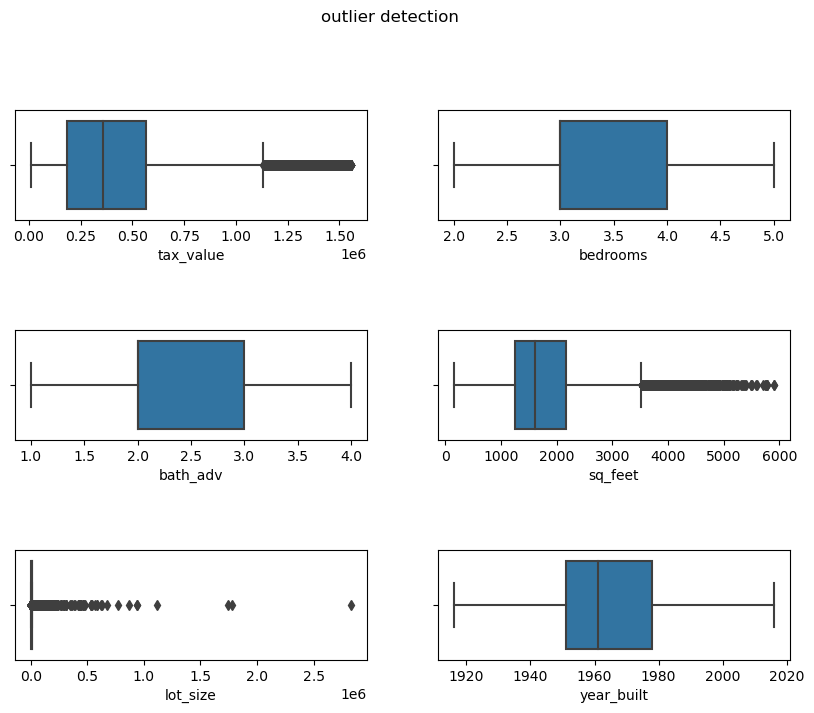

In [167]:
explore_graph1()

KeyError: 'bath_adv'

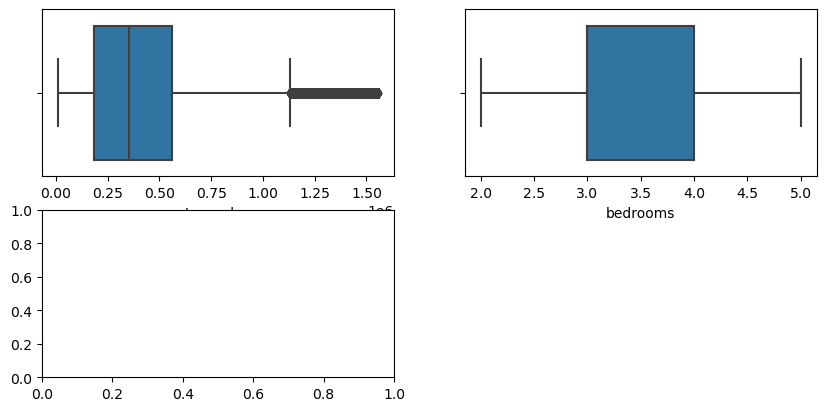

In [170]:
explore_graph2()

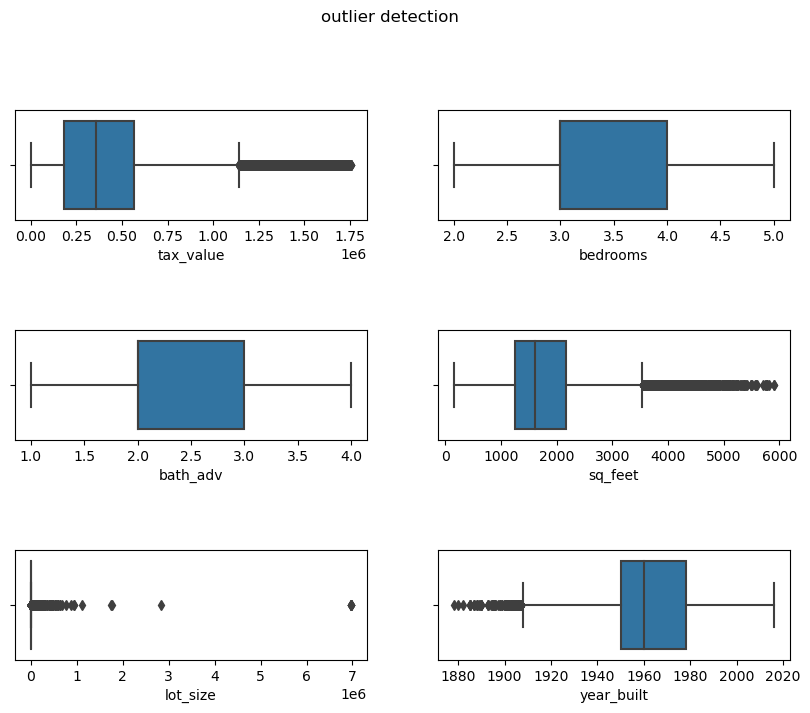

In [101]:
plt.figure(figsize=(10,10))
variables = ['tax_value', 'bedrooms', 'bath_adv', 'sq_feet', 'lot_size', 'year_built']
n=1
for i in variables:
    #n = 1
    plt.subplot(4,2,n)
    sns.boxplot(x = df[i])
    n +=1
    
plt.subplots_adjust(hspace=1)   
plt.suptitle('outlier detection')
plt.show()

In [155]:
df['tax_value'].mean()*0.02

8493.4215772138

In [158]:

low_tax_bool = df['tax_value'] < 6000
df['tax_value'][low_tax_bool].sum()

4254

In [161]:
high_tax_bool = df['tax_value'] < 1557580
low_tax_bool = df['tax_value'] > 6000
df['tax_value'][high_tax_bool & low_tax_bool].count()

46968

In [131]:
high_lot_size_bool = df['lot_size'] < 6000000
low_lot_size_bool = df['lot_size'] > 750
df['lot_size'][high_lot_size_bool & low_lot_size_bool].count()

48287

In [111]:
low_year_built_bool = df['year_built'] > 1915
df['year_built'][low_year_built_bool].count()

47403

In [21]:
df = df.rename(columns={'bedroomcnt':'bedrooms', 
                                'bathroomcnt':'baths', 
                                'calculatedfinishedsquarefeet':'sq_feet', 
                                'yearbuilt':'year_built',
                                'taxvaluedollarcnt':'tax_value',
                                'calculatedbathnbr':'bath_adv',
                                'lotsizesquarefeet':'lot_size',                               
                                })

In [25]:
naan_drop_columns = ['tax_value', 'sq_feet', 'bath_adv', 'lot_size', 'year_built']    

# drop naans based on the columns identified above
df = df.dropna(subset = naan_drop_columns)

In [59]:
# split data without differentiating counties
x_train, y_train, x_validate, y_validate, x_test, y_test = wr.x_y(df, 'tax_value')


In [60]:
target = y_train
independent = x_train

In [84]:
''' 
scoring best variables using f_regression
'''


kbest = SelectKBest(score_func=f_regression, k=5)
kbest.fit(x_train, y_train)
x_train.columns[kbest.get_support()]
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(independent.columns)

#concat two dataframes for better visualization 
feature_scores1 = pd.concat([dfcolumns, dfscores], axis=1)

# renaming the two columns to make sense
feature_scores1.columns= ['variables','score']
feature_scores1.nlargest(5,'score')

,variables,score
4,lot_size,2.090615e+10
3,sq_feet,7.306631e+06
2,bath_adv,6.830078e+03
1,baths,6.587760e+03
5,year_built,5.707548e+03
0,bedrooms,4.505879e+03


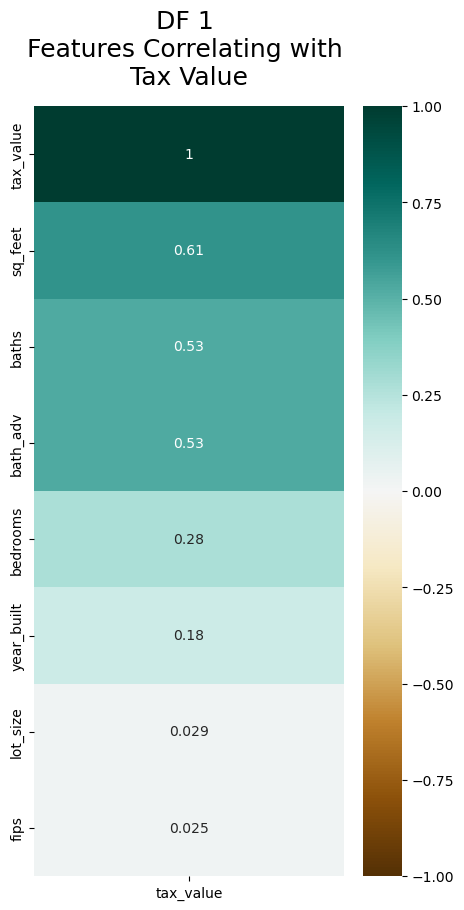

In [34]:
# sets size of the vizualization product
plt.figure(figsize=(5,10))

# DataFrame 1 - both features
# creates a vertical heat map, correlating values in dataframe with a feature in the dataframe 
# (the target value to be predicted)
#plt.subplot(1,2,1)
heatmap = sns.heatmap(df.corr()[['tax_value']].sort_values(by='tax_value', ascending = False), vmin=-1, vmax=1, annot=True,cmap='BrBG')

# title information
heatmap.set_title('DF 1 \nFeatures Correlating with \nTax Value', fontdict={'fontsize':18}, pad=16);

In [44]:
import keyword

In [45]:
keyword.kwlist

['False',
 'None',
 'True',
 '__peg_parser__',
 'and',
 'as',
 'assert',
 'async',
 'await',
 'break',
 'class',
 'continue',
 'def',
 'del',
 'elif',
 'else',
 'except',
 'finally',
 'for',
 'from',
 'global',
 'if',
 'import',
 'in',
 'is',
 'lambda',
 'nonlocal',
 'not',
 'or',
 'pass',
 'raise',
 'return',
 'try',
 'while',
 'with',
 'yield']